# Test that masks/cloudnumbers are being correctly regridded/coarsened from MCS dataset to ERA5 grid

The heavy lifting is all done by era5_histograms.GenERA5Masks. Here, I just check that the original masks match the regridded ones.

In [1]:
import datetime as dt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

from remake import load_remake

from mcs_prime import McsTracks

In [2]:
e5h = load_remake('../../remakefiles/era5_histograms.py')

In [3]:
t = e5h.GenERA5Masks.tasks[0]
e5m = xr.load_dataset(t.outputs['e5mask'])

In [4]:
e5m

<xarray.Dataset>
Dimensions:          (time: 24, latitude: 481, longitude: 1440)
Coordinates:
  * time             (time) datetime64[ns] 2020-01-01T00:30:00 ... 2020-01-01...
  * latitude         (latitude) float32 60.0 59.75 59.5 ... -59.5 -59.75 -60.0
  * longitude        (longitude) float32 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Data variables:
    MCS_cloudnumber  (time, latitude, longitude) int16 0 0 0 0 0 0 ... 0 0 0 0 0
    conv_mask        (time, latitude, longitude) int16 0 0 0 0 0 0 ... 0 0 0 0 0

In [5]:
dspixel = xr.open_dataset(t.inputs['pixel_0'])

In [6]:
tracks = McsTracks.open(t.inputs['tracks'], None)

In [7]:
time = dt.datetime(t.year, t.month, t.day, 0, 30)

ts = tracks.tracks_at_time(time)
pdtime = pd.Timestamp(time)

tmask = (ts.dstracks.base_time == pdtime).values
cns = ts.dstracks.cloudnumber.values[tmask]
cns.sort()


In [8]:
cns

array([  4.,   6.,   7.,  10.,  11.,  13.,  18.,  24.,  27.,  30.,  35.,
        39.,  41.,  42.,  43.,  45.,  46.,  57.,  76.,  78.,  86.,  92.,
        96., 103., 107., 108., 112., 121., 124., 126., 177., 182., 198.,
       293.])

In [9]:
np.unique(e5m.MCS_cloudnumber[0].values)[1:]

array([  4,   6,   7,  10,  11,  13,  18,  24,  27,  30,  35,  39,  41,
        42,  43,  45,  46,  57,  76,  78,  86,  92,  96, 103, 107, 108,
       112, 121, 124, 126, 177, 182, 198, 293], dtype=int16)

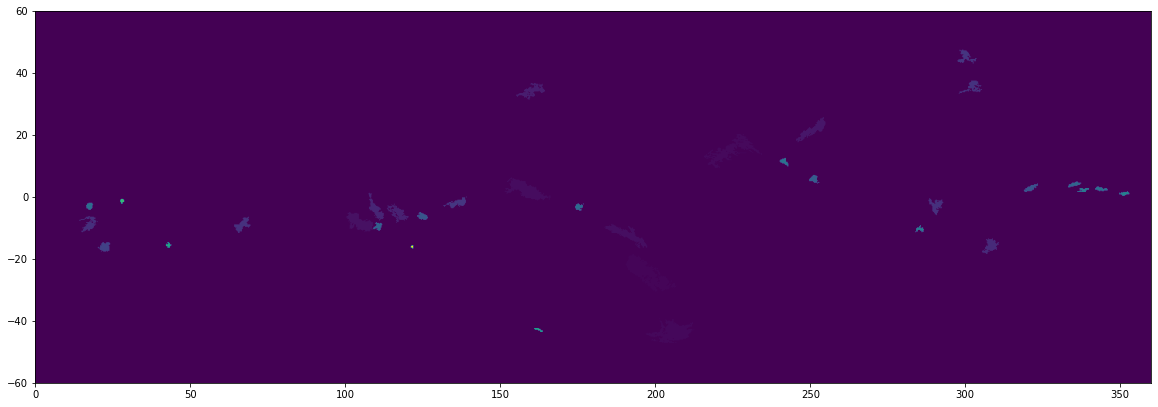

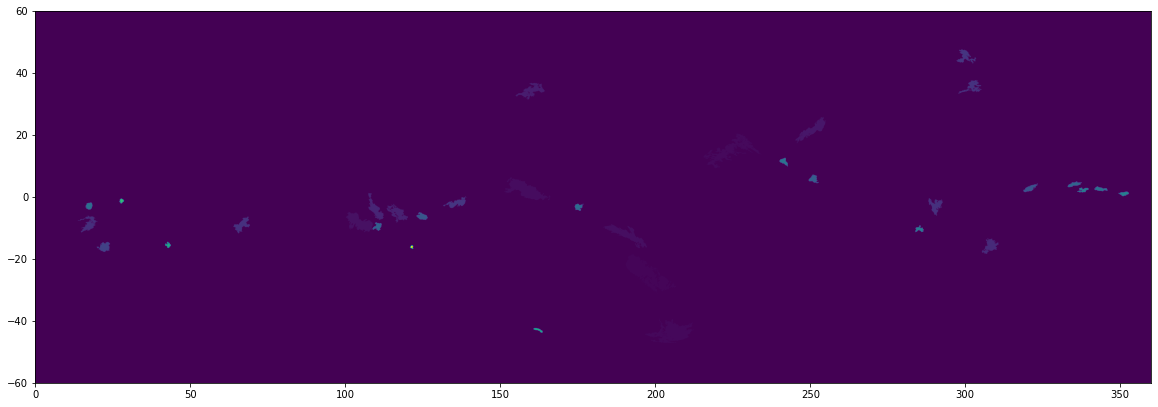

In [10]:
def plot(xlim=(0, 360), ylim=(-60, 60)):
    plt.figure(figsize=(20, 10))
    plt.imshow(e5m.MCS_cloudnumber[0].values, extent=(0, 360, -60, 60))
    plt.xlim(xlim)
    plt.ylim(ylim)

    cn = dspixel.cloudnumber.values[0].copy()
    cn[~dspixel.cloudnumber.isin(cns).values[0]] = 0
    plt.figure(figsize=(20, 10))
    plt.imshow(np.roll(cn, 1800, axis=1), extent=(0, 360, -60, 60), origin='lower')
    plt.xlim(xlim)
    plt.ylim(ylim)

plot()

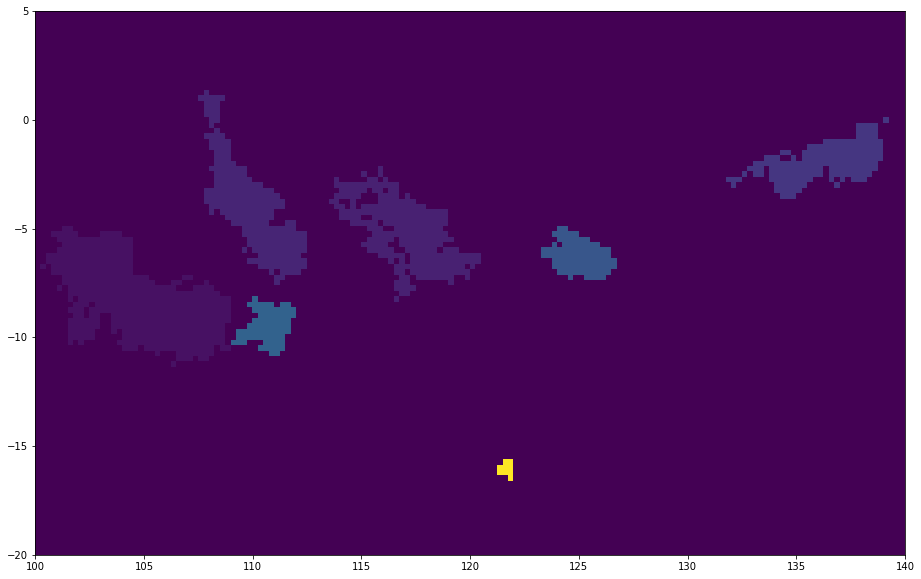

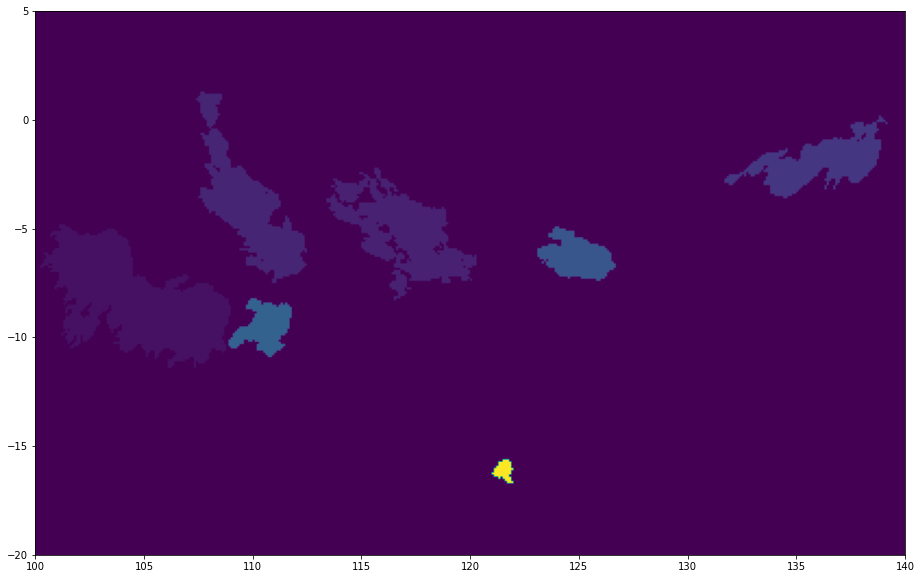

In [14]:
plot(xlim=(100, 140), ylim=(-20, 5))


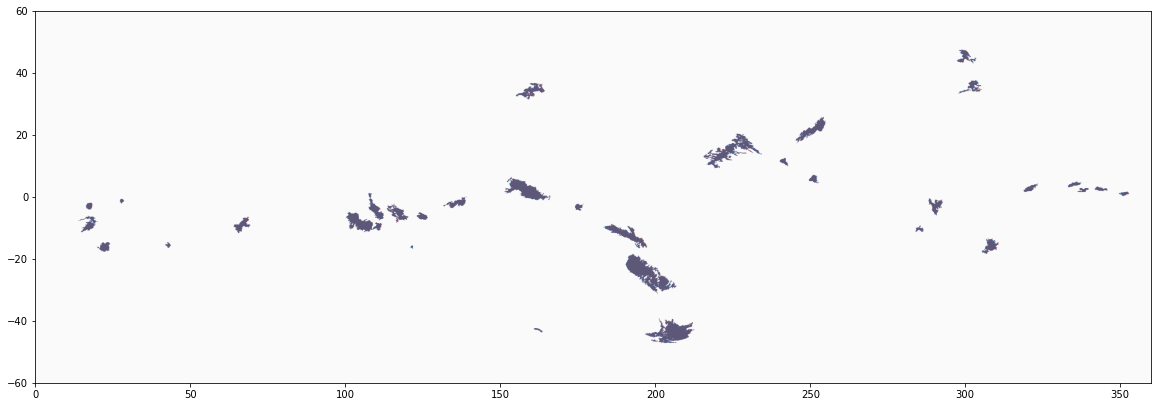

In [18]:
def plot_combined(xlim=(0, 360), ylim=(-60, 60)):
    plt.figure(figsize=(20, 10))
    plt.imshow(e5m.MCS_cloudnumber[0].values > 0.5, extent=(0, 360, -60, 60), alpha=0.5, cmap='Reds')

    cn = dspixel.cloudnumber.values[0].copy()
    cn[~dspixel.cloudnumber.isin(cns).values[0]] = 0
    plt.imshow(np.roll(cn, 1800, axis=1) > 0.5, extent=(0, 360, -60, 60), origin='lower', alpha=0.5, cmap='Blues')
    plt.xlim(xlim)
    plt.ylim(ylim)

plot_combined()

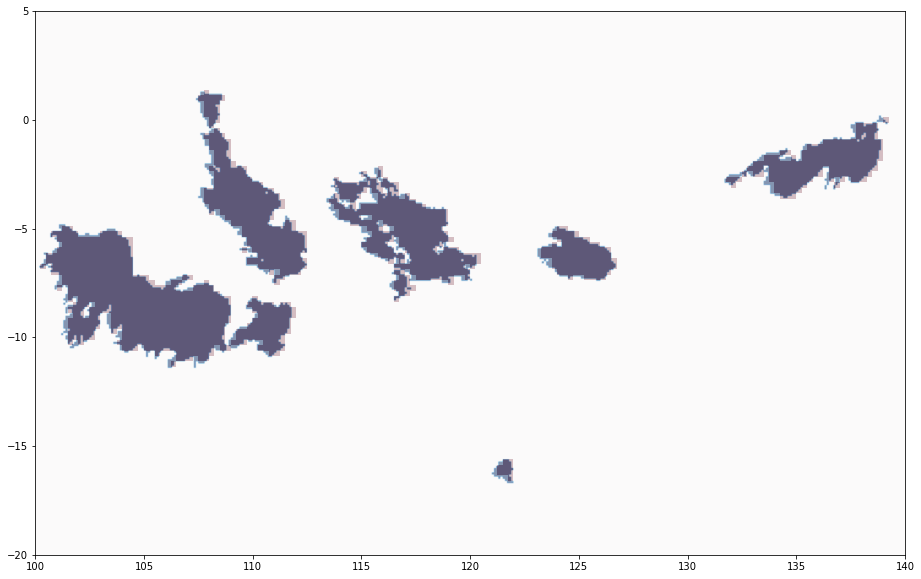

In [19]:
plot_combined(xlim=(100, 140), ylim=(-20, 5))


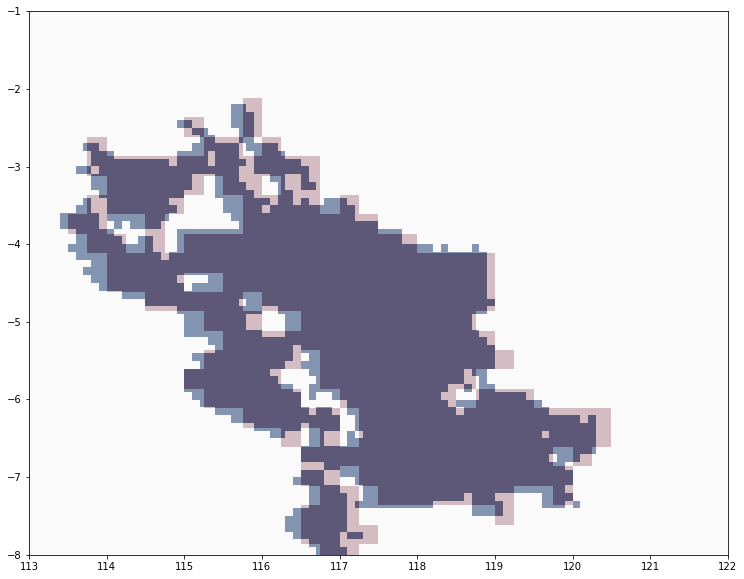

In [20]:
plot_combined(xlim=(113, 122), ylim=(-8, -1))


In [21]:
dspixel

<xarray.Dataset>
Dimensions:                        (time: 1, lat: 1200, lon: 3600)
Coordinates:
  * time                           (time) datetime64[ns] 2020-01-01T00:30:00....
  * lat                            (lat) float32 -59.95 -59.85 ... 59.85 59.95
  * lon                            (lon) float32 -179.9 -179.9 ... 179.9 179.9
Data variables:
    base_time                      (time) datetime64[ns] ...
    longitude                      (lat, lon) float32 ...
    latitude                       (lat, lon) float32 ...
    tb                             (time, lat, lon) float32 ...
    precipitation                  (time, lat, lon) float32 ...
    cloudtype                      (time, lat, lon) float64 ...
    cloudnumber                    (time, lat, lon) float64 nan nan ... nan nan
    split_tracknumbers             (time, lat, lon) float64 ...
    merge_tracknumbers             (time, lat, lon) float64 ...
    cloudtracknumber_nomergesplit  (time, lat, lon) float64 ...
    cloudtracknumber               (time, lat, lon) float64 ...
    pcptracknumber                 (time, lat, lon) float64 ...
Attributes:
    Title:                     Robust MCS pixel-level tracking data
    Contact:                   Zhe Feng: zhe.feng@pnnl.gov
    Created_on:                Tue Apr  5 16:11:09 2022
    startdate:                 20200101.0000
    enddate:                   20210101.0000
    precipitation_datasource:  imerg
    mcs_tb_area_thresh:        40000
    mcs_tb_duration_thresh:    4
    mcs_pf_majoraxis_thresh:   100
    mcs_pf_durationthresh:     4

In [22]:
e5m

<xarray.Dataset>
Dimensions:          (time: 24, latitude: 481, longitude: 1440)
Coordinates:
  * time             (time) datetime64[ns] 2020-01-01T00:30:00 ... 2020-01-01...
  * latitude         (latitude) float32 60.0 59.75 59.5 ... -59.5 -59.75 -60.0
  * longitude        (longitude) float32 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Data variables:
    MCS_cloudnumber  (time, latitude, longitude) int16 0 0 0 0 0 0 ... 0 0 0 0 0
    conv_mask        (time, latitude, longitude) int16 0 0 0 0 0 0 ... 0 0 0 0 0

In [23]:
dspixel.cloudnumber

<xarray.DataArray 'cloudnumber' (time: 1, lat: 1200, lon: 3600)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T00:30:00.000013312
  * lat      (lat) float32 -59.95 -59.85 -59.75 -59.65 ... 59.75 59.85 59.95
  * lon      (lon) float32 -179.9 -179.9 -179.8 -179.6 ... 179.8 179.9 179.9
Attributes:
    long_name:  Labeled feature number for tracking
    units:      unitless

In [24]:
e5m.MCS_cloudnumber

<xarray.DataArray 'MCS_cloudnumber' (time: 24, latitude: 481, longitude: 1440)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=int16)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-01T00:30:00 ... 2020-01-01T23:30:00
  * latitude   (latitude) float32 60.0 59.75 59.5 59.25 ... -59.5 -59.75 -60.0
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8

In [33]:
dspixel.lat.values[[0, -1]]

array([-59.95,  59.95], dtype=float32)

In [34]:
dspixel.lon.values[[0, -1]]

array([-179.95,  179.95], dtype=float32)

In [32]:
e5m.latitude.values[[0, -1]]

array([ 60., -60.], dtype=float32)

In [35]:
e5m.longitude.values[[0, -1]]

array([  0.  , 359.75], dtype=float32)

In [36]:
dspixel_dx = dspixel.lon.values[1] - dspixel.lon.values[0]
dspixel_dy = dspixel.lat.values[1] - dspixel.lat.values[0]
e5m_dx = e5m.longitude.values[1] - e5m.longitude.values[0]
e5m_dy = e5m.latitude.values[1] - e5m.latitude.values[0]

In [40]:
dspixel_minx, dspixel_maxx = (np.roll(dspixel.lon.values, 1800) % 360)[[0, -1]]

In [41]:
dspixel_extent = (
    dspixel_minx - dspixel_dx / 2, 
    dspixel_maxx + dspixel_dx / 2, 
    dspixel.lat.values[0] - dspixel_dy / 2,
    dspixel.lat.values[-1] + dspixel_dy / 2
)
print(dspixel_extent)

(4.578381776809692e-06, 360.00000762939453, -60.00000190734863, 60.00000190734863)


In [48]:
e5m_extent = (
    e5m.longitude.values[0] - e5m_dx / 2, 
    e5m.longitude.values[-1] + e5m_dx / 2, 
    e5m.latitude.values[-1] - e5m_dy / 2,
    e5m.latitude.values[0] + e5m_dy / 2
)
print(e5m_extent)

(-0.125, 359.875, -59.875, 59.875)


In [49]:
def plot_combined_exact(xlim=(0, 360), ylim=(-60, 60)):
    plt.figure(figsize=(20, 10))
    plt.imshow(e5m.MCS_cloudnumber[0].values > 0.5, extent=e5m_extent, alpha=0.5, cmap='Reds')

    cn = dspixel.cloudnumber.values[0].copy()
    cn[~dspixel.cloudnumber.isin(cns).values[0]] = 0
    plt.imshow(np.roll(cn, 1800, axis=1) > 0.5, extent=dspixel_extent, origin='lower', alpha=0.5, cmap='Blues')
    plt.xlim(xlim)
    plt.ylim(ylim)

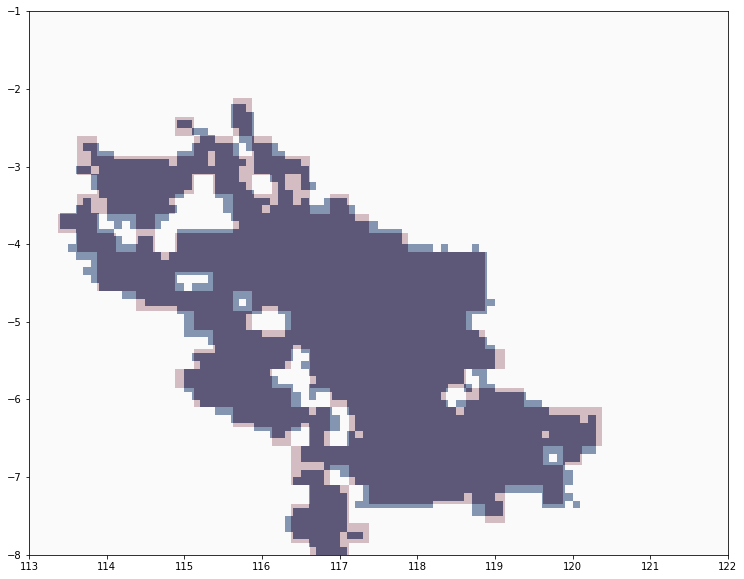

In [50]:
plot_combined_exact(xlim=(113, 122), ylim=(-8, -1))


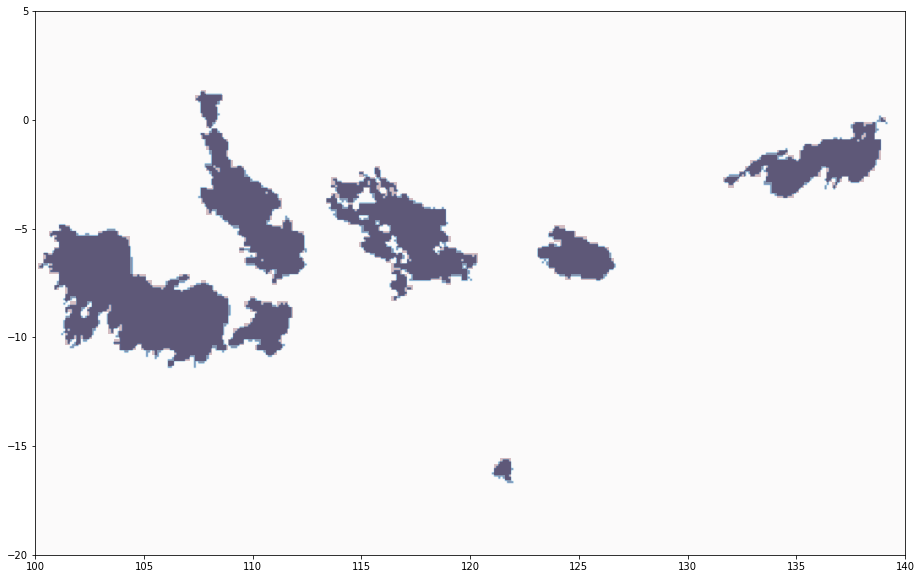

In [51]:
plot_combined_exact(xlim=(100, 140), ylim=(-20, 5))


In [53]:
e5m

<xarray.Dataset>
Dimensions:          (time: 24, latitude: 481, longitude: 1440)
Coordinates:
  * time             (time) datetime64[ns] 2020-01-01T00:30:00 ... 2020-01-01...
  * latitude         (latitude) float32 60.0 59.75 59.5 ... -59.5 -59.75 -60.0
  * longitude        (longitude) float32 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Data variables:
    MCS_cloudnumber  (time, latitude, longitude) int16 0 0 0 0 0 0 ... 0 0 0 0 0
    conv_mask        (time, latitude, longitude) int16 0 0 0 0 0 0 ... 0 0 0 0 0

In [58]:
for t in e5m.time.values:
    pdt = pd.Timestamp(t)
    print(pdt.to_pydatetime())

2020-01-01 00:30:00
2020-01-01 01:30:00
2020-01-01 02:30:00
2020-01-01 03:30:00
2020-01-01 04:30:00
2020-01-01 05:30:00
2020-01-01 06:30:00
2020-01-01 07:30:00
2020-01-01 08:30:00
2020-01-01 09:30:00
2020-01-01 10:30:00
2020-01-01 11:30:00
2020-01-01 12:30:00
2020-01-01 13:30:00
2020-01-01 14:30:00
2020-01-01 15:30:00
2020-01-01 16:30:00
2020-01-01 17:30:00
2020-01-01 18:30:00
2020-01-01 19:30:00
2020-01-01 20:30:00
2020-01-01 21:30:00
2020-01-01 22:30:00
2020-01-01 23:30:00
